In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Практическое задание 1.

### Создаём датасеты

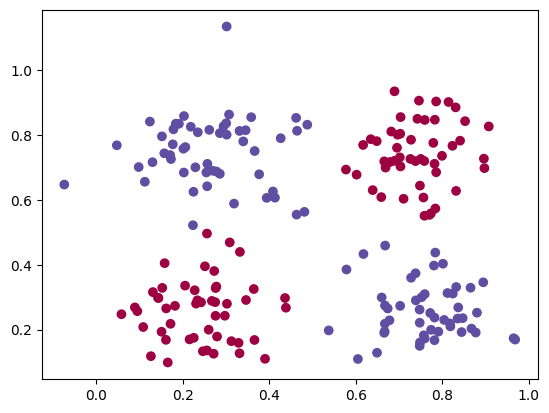

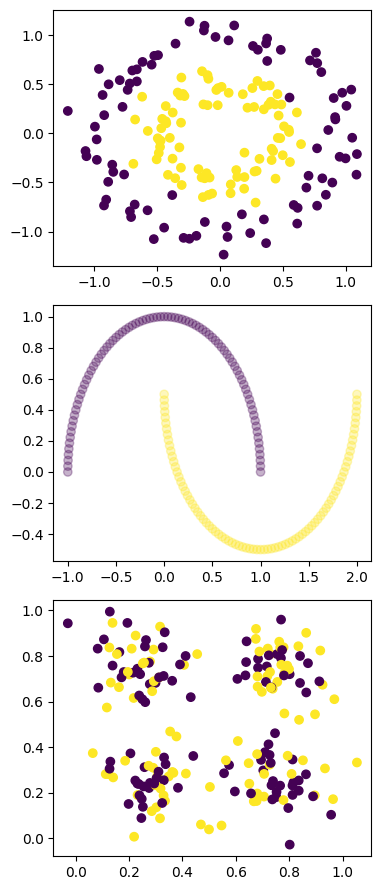

In [167]:
x1, y1 = make_circles(n_samples=170, noise = 0.1, factor = 0.5)
x2, y2 = make_moons(n_samples = 170)
x3, y3 = make_blobs(n_samples=200, centers=[(0.75,0.75), (0.25,0.25), (0.25, 0.75), (0.75,0.25)], cluster_std=.1, random_state=1)

y3[(data[:, 0] > 0.5) & (x3[:, 1] > 0.5)] = 0
y3[(data[:, 0] < 0.5) & (x3[:, 1] > 0.5)] = 1
y3[(data[:, 0] < 0.5) & (x3[:, 1] < 0.5)] = 0
y3[(data[:, 0] > 0.5) & (x3[:, 1] < 0.5)] = 1

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Spectral)


fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize=(4,9))

axes[0].scatter(x1[:,0],x1[:,1],c=y1)
axes[1].scatter(x2[:,0],x2[:,1],c=y2, alpha=0.3)
axes[2].scatter(x3[:,0],x3[:,1],c=y3)

plt.tight_layout()
plt.show()

##### нумерация датасетов в соответствиями с порядком графика, а не по переменных

## Построение графика точности классификации при разных k для первого датасета

[0.9743589743589743, 0.9743589743589743, 0.9743589743589743, 0.9743589743589743, 0.9743589743589743, 0.9743589743589743, 0.9743589743589743, 0.9743589743589743]


Text(0, 0.5, 'F1-score')

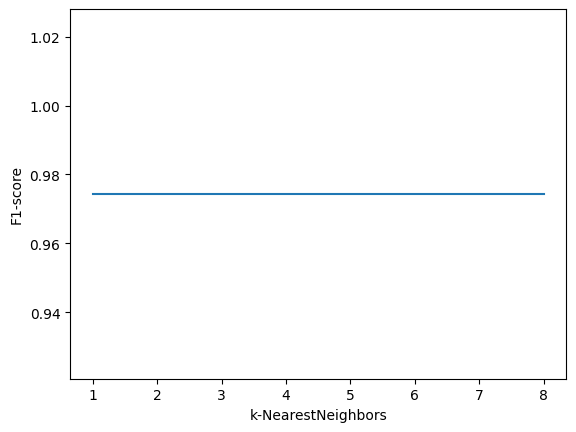

In [168]:
f1_list = []   #в качестве оченки точности будет использоваться метрика f1

for n_neighbors in range(1,9):   # получаем значение f1 для моделей при k [1;8]
    x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,train_size=0.8, random_state=1)
    scaler = StandardScaler()
    scaler.fit(x3_train)
    x3_train = scaler.transform(x3_train)
    x3_test = scaler.transform(x3_test)

    train3 = pd.DataFrame(x3_train, index=x3_train[:,0])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x3_train,y3_train)
    predictions3 = knn.predict(x3_test)

    f1 = f1_score(y1_test, predictions1)
    f1_list.append(f1)
print(f1_list)

plt.plot([1,2,3,4,5,6,7,8],f1_list)
plt.xlabel('k-NearestNeighbors')
plt.ylabel('F1-score')

## Вычисляем основные метрики при k (1...8) для первого датасета

In [179]:
for n_neighbors in range(1,9):
    x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,train_size=0.8, random_state=1)
    scaler = StandardScaler()
    scaler.fit(x3_train)
    x3_train = scaler.transform(x3_train)
    x3_test = scaler.transform(x3_test)

    train3 = pd.DataFrame(x3_train, index=x3_train[:,0])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x3_train,y3_train)
    predictions3 = knn.predict(x3_test)

    print('При k=' + str(n_neighbors) + 'имеем следующие показатели:')
    print(classification_report(y3_test, predictions3))
    print('Матрица расхождений:')
    print(confusion_matrix(y3_test, predictions3))
    print('')

При k=1имеем следующие показатели:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        21
           1       0.46      0.63      0.53        19

    accuracy                           0.48        40
   macro avg       0.48      0.48      0.47        40
weighted avg       0.48      0.47      0.46        40

Матрица расхождений:
[[ 7 14]
 [ 7 12]]

При k=2имеем следующие показатели:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        21
           1       0.42      0.26      0.32        19

    accuracy                           0.48        40
   macro avg       0.46      0.46      0.45        40
weighted avg       0.46      0.47      0.45        40

Матрица расхождений:
[[14  7]
 [14  5]]

При k=3имеем следующие показатели:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59        21
           1       0.53      0.47      0.50       

## Построение графика точности классификации при разных k для второго датасета

[0.9655172413793104, 1.0, 1.0, 1.0, 0.9655172413793104, 0.9655172413793104, 0.9655172413793104, 0.9655172413793104]


Text(0, 0.5, 'F1-score')

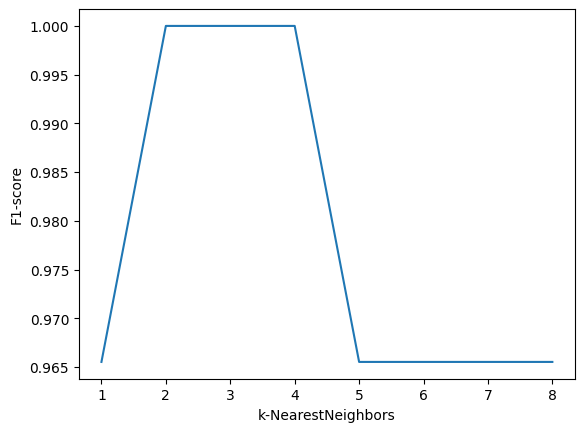

In [170]:
f1_list = []   #в качестве оченки точности будет использоваться метрика f1

for n_neighbors in range(1,9):   # получаем значение f1 для моделей при k [1;8]
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,train_size=0.8, random_state=1)
    scaler = StandardScaler()
    scaler.fit(x1_train)
    x1_train = scaler.transform(x1_train)
    x1_test = scaler.transform(x1_test)

    train1 = pd.DataFrame(x1_train, index=x1_train[:,0])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x1_train,y1_train)
    predictions1 = knn.predict(x1_test)

    f1 = f1_score(y1_test, predictions1)
    f1_list.append(f1)
print(f1_list)

plt.plot([1,2,3,4,5,6,7,8],f1_list)
plt.xlabel('k-NearestNeighbors')
plt.ylabel('F1-score')

## Вычисляем основные метрики при k (1...8) для второго датасета

In [178]:
for n_neighbors in range(1,9):
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,train_size=0.8, random_state=1)
    scaler = StandardScaler()
    scaler.fit(x1_train)
    x1_train = scaler.transform(x1_train)
    x1_test = scaler.transform(x1_test)

    train1 = pd.DataFrame(x1_train, index=x1_train[:,0])
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(x1_train,y1_train)
    predictions1 = knn.predict(x1_test)

    print('При k=' + str(n_neighbors) + 'имеем следующие показатели:')
    print(classification_report(y1_test, predictions1))
    print('Матрица расхождений:')
    print(confusion_matrix(y1_test, predictions1))
    print('')

При k=1имеем следующие показатели:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.93      1.00      0.97        14

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Матрица расхождений:
[[19  1]
 [ 0 14]]

При k=2имеем следующие показатели:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.93      1.00      0.97        14

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

Матрица расхождений:
[[19  1]
 [ 0 14]]

При k=3имеем следующие показатели:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.93      1.00      0.97       

## Построение графика точности классификации при разных k для третьего датасета

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'F1-score')

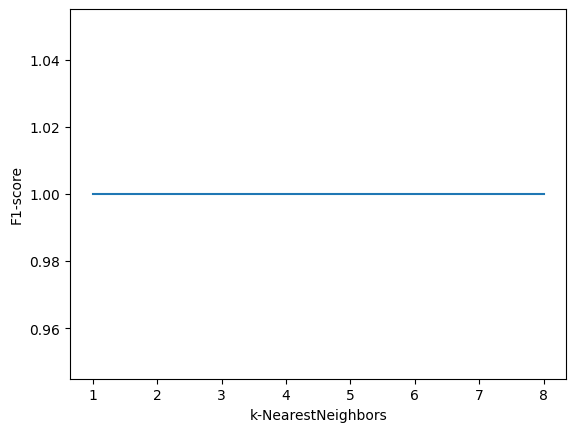

In [172]:
f1_list = []   #в качестве оченки точности будет использоваться метрика f1

for n_neighbors in range(1,9):   # получаем значение f1 для моделей при k [1;8]
    x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,train_size=0.8, random_state=1)
    scaler = StandardScaler()
    scaler.fit(x2_train)
    x2_train = scaler.transform(x2_train)
    x2_test = scaler.transform(x2_test)

    train2 = pd.DataFrame(x2_train, index=x2_train[:,0])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x2_train,y2_train)
    predictions2 = knn.predict(x2_test)

    f1 = f1_score(y2_test, predictions2)
    f1_list.append(f1)
print(f1_list)

plt.plot([1,2,3,4,5,6,7,8],f1_list)
plt.xlabel('k-NearestNeighbors')
plt.ylabel('F1-score')

## Вычисляем основные метрики при k (1...8) для третьего датасета

In [177]:
for n_neighbors in range(1,9):
    x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,train_size=0.8, random_state=1)
    scaler = StandardScaler()
    scaler.fit(x2_train)
    x2_train = scaler.transform(x2_train)
    x2_test = scaler.transform(x2_test)

    train2 = pd.DataFrame(x2_train, index=x2_train[:,0])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x2_train,y2_train)
    predictions2 = knn.predict(x2_test)

    print('При k=' + str(n_neighbors) + 'имеем следующие показатели:')
    print(classification_report(y2_test, predictions2))
    print('Матрица расхождений:')
    print(confusion_matrix(y2_test, predictions2))
    print('')

При k=1имеем следующие показатели:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

Матрица расхождений:
[[20  0]
 [ 0 14]]

При k=2имеем следующие показатели:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

Матрица расхождений:
[[20  0]
 [ 0 14]]

При k=3имеем следующие показатели:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00       

# Практическое задание 2.

In [1]:
C="Cat"
F="Fish"
H="Hen"
# истинные значения
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
# результат системы
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

In [2]:
TP = 0 # общее True Positive
FP = 0 

TPc = 0
TPf = 0
TPh = 0

FPc = 0
FPf = 0
FPh = 0

for i in range(len(y_true)):
    if y_true[i] == y_pred[i]:
        TP += 1
        if  y_true[i] == C:
            TPc += 1
        elif y_true[i] == F:
            TPf += 1
        else:
            TPh +=1
    else:
        FP += 1
        if y_pred[i] == C:
            FPc += 1
        elif y_pred[i] == F:
            FPf += 1
        else:
            FPh +=1
            
        
             
print('TP = ' + str(TP))
print('FP = ' + str(FP))
print('')
print('TPc = ' + str(TPc))
print('TPf = ' + str(TPf))
print('TPh = ' + str(TPh))   
print('')
print('FPc = ' + str(FPc))
print('FPf = ' + str(FPf))
print('FPh = ' + str(FPh))

TP = 12
FP = 13

TPc = 4
TPf = 2
TPh = 6

FPc = 9
FPf = 1
FPh = 3


$precision-macro-avg = \frac {p1+p2+p3}{3}$

$p_i = \frac {TP_i}{TP_i+FP_i}$

In [9]:
pc = TPc/(TPc+FPc)  # precision для класса C
pf = TPf/(TPf+FPf)  # F
ph = TPh/(TPh+FPh)  # H

presicion_per_class = [pc,pf,ph]
presicion_per_class = np.array(presicion_per_class)

precision_macro_avg = np.sum(presicion_per_class)/3
print('precision_macro_avg = ' + str(precision_macro_avg))

precision_macro_avg = 0.547008547008547


$precision-weighted-avg = \frac {\sum{p_i*s_i}}{\sum{s_i}}$

In [10]:
num_of_C = 0   # число наблюдений C
num_of_F = 0   # F
num_of_H = 0   # H

for i in range(len(y_true)):
    if y_true[i] == C:
        num_of_C += 1
    elif y_true[i] == F:
        num_of_F += 1
    else:
        num_of_H += 1        
amount_per_class = [num_of_C, num_of_F, num_of_H]
amount_per_class = np.array(amount_per_class)

precision_macro_avg = (np.sum(presicion_per_class*amount_per_class))/np.sum(amount_per_class) # сумма произведений p_i * s_i / сумма s_i
print('precision_macro_avg = ' + str(np.round(precision_macro_avg, decimals=3)))

precision_macro_avg = 0.581


$recall-macro-avg = \frac {\sum{r_i}}{3}$

$r_i = \frac {TP}{TP+FN}$

In [11]:
FNc = 0
FNf = 0
FNh = 0

for i in range(len(y_true)):
    if y_true[i] == C and y_true[i] != y_pred[i]:
        FNc += 1
    elif y_true[i] == F and y_true[i] != y_pred[i]:
        FNf += 1
    elif y_true[i] == H and y_true[i] != y_pred[i]:
        FNh += 1

rc = TPc/(TPc+FNc)  # recall для класса С
rf = TPf/(TPf+FNf)  # F
rh = TPh/(TPh+FNh)  # H

recall_per_class = [rc,rf,rh]
recall_per_class = np.array(recall_per_class)

recall_macro_avg = np.sum(recall_per_class)/3
print('recall_macro_avg = ' + str(np.round(recall_macro_avg,decimals=3)))

recall_macro_avg = 0.511


$recall-weighted-avg = \frac {\sum{r_i * s_i}}{\sum{s_i}}$

In [12]:
recall_weighted_avg = np.sum(recall_per_class*amount_per_class)/np.sum(amount_per_class)
print('recall_weighted_avg = ' + str(recall_weighted_avg))

recall_weighted_avg = 0.48


$f1-score-macro-avg = \frac {\sum{{F1}_i}}{3} $

${F1}_i = \frac {1}{\frac {1}{precision_i} + \frac{1}{recall_i}}$

In [13]:
F1c = 2*rc*pc/(pc+rc)
F1f = 2*rf*pf/(pf+rf)
F1h = 2*rh*ph/(ph+rh)

F1_per_class = [F1c, F1f, F1h]
F1_per_class = np.array(F1_per_class)

f1_score_macro_avg = np.sum(F1_per_class)/3
print('f1_score_macro_avg = ' + str(np.round(f1_score_macro_avg,3)))

f1_score_macro_avg = 0.465


$f1-score-weighted-avg = \frac {\sum{{F1}_i * s_i}}{\sum{s_i}}$

In [14]:
f1_score_weighted_avg = np.sum(F1_per_class*amount_per_class)/np.sum(amount_per_class)
print('f1_score_weighted_avg = ' + str(np.round(f1_score_weighted_avg,3)))

f1_score_weighted_avg = 0.464


# Практическое задание 3.

In [130]:
dataset = pd.read_csv('world-data-2023.csv')
pd.set_option('display.max_columns', None)

### Модель с тремя переменными одновременно

In [198]:
df = dataset[['Birth Rate','Infant mortality','Maternal mortality ratio','Life expectancy']]
df = df.fillna(df.mean())
df.shape

(195, 4)

In [199]:
target_var = 'Life expectancy'
features = ['Birth Rate','Infant mortality','Maternal mortality ratio']

In [202]:
X_train, X_test, y_train, y_test = train_test_split(df[features],df[target_var],train_size=0.7, random_state = 9)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

r_squared = r2_score(y_test, y_pred)
print(model.coef_)
print('')
print('Показатель R^2: ' + str(r_squared))

[-2.12266858 -4.12095974 -0.78264417]

Показатель R^2: 0.8713885821451729


### Модель для первой переменной 

In [209]:
feature = 'Birth Rate'
X_train, X_test, y_train, y_test = train_test_split(df[feature].values.reshape(-1,1),df[target_var],train_size=0.7, random_state = 9)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

r_squared = r2_score(y_test, y_pred)
print(model.coef_)
print('')
print('Показатель R^2: ' + str(r_squared))

[-6.25556309]

Показатель R^2: 0.7684831423713696


### Модель для второй переменной 

In [210]:
feature = 'Infant mortality'
X_train, X_test, y_train, y_test = train_test_split(df[feature].values.reshape(-1,1),df[target_var],train_size=0.7, random_state = 9)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

r_squared = r2_score(y_test, y_pred)
print(model.coef_)
print('')
print('Показатель R^2: ' + str(r_squared))

[-6.64179248]

Показатель R^2: 0.8466381347370757


### Модель для третьей переменной 

In [211]:
feature = 'Maternal mortality ratio'
X_train, X_test, y_train, y_test = train_test_split(df[feature].values.reshape(-1,1),df[target_var],train_size=0.7, random_state = 9)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

r_squared = r2_score(y_test, y_pred)
print(model.coef_)
print('')
print('Показатель R^2: ' + str(r_squared))

[-6.0032969]

Показатель R^2: 0.6233237260664555


### Вывод

Наилучшим показателем $R^2$ обладает вторая модель, в основу которой положена переменная 'Infant Mortality'